# Predicción del precio de venta de las excavadoras utilizando el aprendizaje automático


## 1. Definición del problema

> ¿Qué tan bien podemos predecir el precio de venta futuro de una excavadora, dadas sus características y ejemplos anteriores de cuánto se han vendido excavadoras similares?

## 2. Datos

Los datos se descargan de la competencia Kaggle Bluebook for Bulldozers: https://www.kaggle.com/c/bluebook-for-bulldozers/data

Hay 3 conjuntos de datos principales:

* Train.csv es el conjunto de entrenamiento, que contiene datos hasta finales de 2011.
* Valid.csv es el conjunto de validación, que contiene datos del 1 de enero de 2012 al 30 de abril de 2012. Haces predicciones en este conjunto durante la mayor parte de la competencia. Su puntaje en este conjunto se usa para crear la tabla de clasificación pública.
* Test.csv es el conjunto de prueba, que no se lanzará hasta la última semana de la competencia. Contiene datos del 1 de mayo de 2012 a noviembre de 2012. Su puntaje en el conjunto de pruebas determina su clasificación final para la competencia.

## 3. Evaluación

La métrica de evaluación para esta competencia es el RMSLE (error de registro cuadrático medio) entre los precios de subasta reales y previstos.

Para obtener más información sobre la evaluación de este proyecto, consulte: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/e Evaluation

**Nota:** El objetivo de la mayoría de las métricas de evaluación de regresión es minimizar el error. Por ejemplo, nuestro objetivo para este proyecto será construir un modelo de aprendizaje automático que minimice RMSLE.

## 4. Características

Kaggle proporciona un diccionario de datos que detalla todas las características del conjunto de datos. Puede ver este diccionario de datos en Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

El Proyecto predice el precio de venta futuro de excavadoras utilizando aprendizaje automático. Se descargan datos de la competencia Kaggle Bluebook for Bulldozers, que contiene tres conjuntos de datos: entrenamiento, validación y prueba. La métrica de evaluación utilizada es el RMSLE (error de registro cuadrático medio) entre los precios de subasta reales y previstos. El objetivo es minimizar el error y se proporciona un diccionario de datos que detalla todas las características del conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# Importar conjuntos de entrenamiento y validación
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Sin parse_dates... verifique el tipo de "saledate"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# DETECTA VALORES NAN...VALORES FALTANTES
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

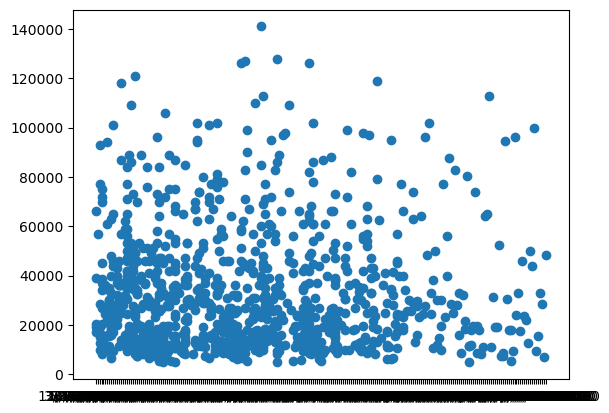

In [5]:
# GRAFICA...solo con 1000 elementos
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [6]:
# PARA EL EJE X NO SE DISTINGUEN LAS FECHAS
df["saledate"][:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [7]:
# VERIFICO EL TIPO DE DATOS DE LA COLUMNA saledate (Object)
df["saledate"].dtype

dtype('O')

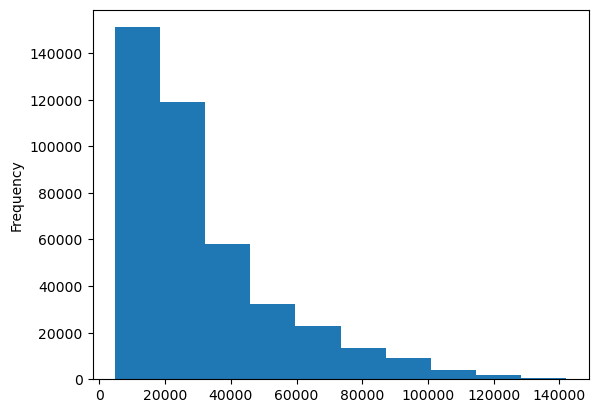

In [8]:
# Grafiquemos un Histograma
df["SalePrice"].plot.hist();

### Fechas de análisis
Cuando se trabaja con datos de series temporales, es una buena idea asegurarse de que los datos de fecha tengan el formato de un [objeto de fecha y hora] (https://docs.python.org/3/library/datetime.html) (un tipo de datos de Python que codifica información específica sobre fechas).

Podemos hacerlo diciéndole a pandas cuál de nuestras columnas tiene fechas usando el parámetro parse_dates.

In [9]:
# IMPORTAMOS NUEVAMENTE PERO ESTA VEZ CON EL PARAMETRO parse_dates["nombreColumnaTipoFecha"] permite convertir a formato fecha
df = pd.read_csv("data/TrainAndValid.csv", 
                 low_memory=False, 
                 parse_dates=["saledate"])

In [10]:
df["saledate"].dtype

dtype('<M8[ns]')

In [11]:
df["saledate"][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

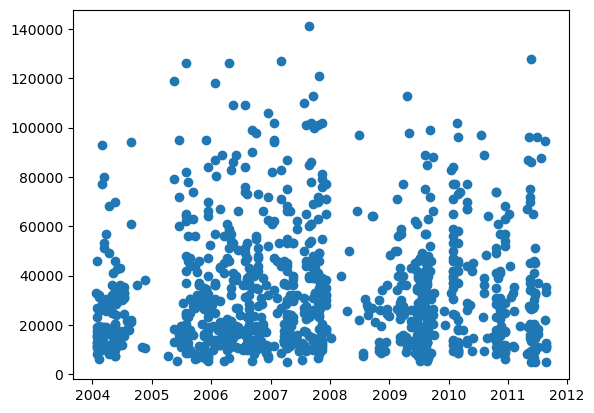

In [12]:
# CON LA FECHA EN FORMATO CORRECTO VOLVEMOS A GRAFICAR EL SCATTER,CON SOLO 1000 EJEMPLOS
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [13]:
# AHORA SE PUEDE VER BIEN EN EL EJE X LAS FECHAS (AÑO)

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# CUANDO SON MUCHAS COLUMNAS JUPYTER NOTEBOOK TRUNCA EL DF PARA VER TODAS LAS COLUMNAS 
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [16]:
# MUESTRO LAS PRIMERAS 20 FILAS DEL DF
df["saledate"].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Ordenar DataFrame por saledate

Cuando se trabaja con datos de series temporales, es una buena idea ordenarlos por fecha.

In [17]:
# ORDENAR DATAFRAME POR FECHA
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df["saledate"].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Hacer una copia del DataFrame original

Hacemos una copia del DForiginal para que cuando manipulemos la copia, todavía tengamos nuestros datos originales.

In [18]:
df_temp = df.copy()

In [19]:
df_temp["saledate"].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Agregar parámetros de fecha y hora para la columna saledate 

¿Por qué?

Para que podamos enriquecer nuestro conjunto de datos con la mayor cantidad de información posible.

In [20]:
df_temp["saleYear"] = df_temp["saledate"].dt.year
df_temp["saleMonth"] = df_temp["saledate"].dt.month
df_temp["saleDay"] = df_temp["saledate"].dt.day
df_temp["saleDayOfWeek"] = df_temp["saledate"].dt.dayofweek
df_temp["saleDayOfYear"] = df_temp["saledate"].dt.dayofyear

In [21]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [22]:
# AHORA QUE SE HA ENRIQUECIDO EL DF CON FUNCIONES DE FECHA Y HORA PODEMOS ELIMINAR saledate
df_temp.drop("saledate", axis=1, inplace=True)

In [23]:
# Devuelve una serie que contiene recuentos de valores únicos.El objeto resultante estará en orden descendente,de modo que el 
# primer elemento es el más frecuente.Excluye los valores NA por defecto.
df_temp["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [24]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [25]:
# CANTIDAD DE FILAS, EJEMPLOS, OBSERVACIONES
len(df_temp)

412698

## 5. Modelado

Antes de modelar se hace necesario convertir las cadenas en categorias ademas de eliminar o imputar los valores Nulos.

In [26]:
# Construyamos un modelo de aprendizaje automático 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [27]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [28]:
df_temp["UsageBand"].dtype

dtype('O')

In [29]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convertir cadenas en categorías

Una forma de ayudar a convertir todos nuestros datos en números es convertir a cadenas y luego a datos categoricos.

Para ello podemos utilizar la [API de tipos de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality) que nos permite interactuar y manipular los tipos de datos.

In [30]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [31]:
# VERIFICO EL TIPO DE DATOS DE LA COLUMNA UsageBand (Object)
df_temp["UsageBand"].dtype

dtype('O')

In [32]:
# VERIFICAMOS LA COLUMNA UsageBand, PASADA A string
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [33]:
# Encuentra las columnas que contienen cadenas
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [34]:
# ESTO CONVIERTE TODAS LAS COLUMNAS DEL TIPO String A Categoricas
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [35]:
# VERIFICAMOS EL df_temp
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [36]:
df_temp["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [37]:
# Esto convertirá todo el valor de la cadena en valores de categoría
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [38]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [39]:
#df_temp.state.cat.categories
df_temp["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [40]:
# PODRIAMOS VERIFICAR EL VALOR NUMERICO DE LA CATEGORIA
df_temp["state"].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Todos nuestros datos son categóricos y, por lo tanto, ahora podemos convertir las categorías en números, sin embargo, todavía faltan valores...

In [41]:
# VERIFICAR LOS VALORES FALTANTES %
df_temp.isnull().sum() / len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

En el formato en el que está, aún es bueno trabajar con él, guardémoslo en un archivo y volvamos a importarlo para poder continuar.

### Guardar datos procesados

In [42]:
# Exportar df actual
df_temp.to_csv("data/train_temp.csv", index=False)

In [43]:
# Importamos conjunto de Datos procesados
df_temp = pd.read_csv("data/train_temp.csv", low_memory=False)
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [44]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Rellenar los valores que faltan

### Primero los valores numéricos que faltan

In [45]:
# IDENTIFICAR QUE VARIABLES (COLUMNAS) SON NUMERICAS

# Recorremos el nombre de las columnas
for label, content in df_temp.items():
    #Si el contenido de la columna es numerico
    if pd.api.types.is_numeric_dtype(content):
        print(label)


SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [46]:
df_temp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [47]:
# MUESTRA LAS COLUMNAS NUMERICAS QUE CONTIENEN VALORES NULOS
for label, content in df_temp.items():
    # Si el contenido de la columna es numerico
    if pd.api.types.is_numeric_dtype(content):
        # si viene con un valor null mayor que cero
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [48]:
# RELLENAR LAS FILAS VACIAS NUMERICAS CON LA MEDIANA
for label, content in df_temp.items():
    # Si el contenido de la columna es numerico
    if pd.api.types.is_numeric_dtype(content):
        # si viene con un valor null mayor que cero
        if pd.isnull(content).sum():
            # Agregue una columna binaria que indique si faltan datos o no
            df_temp[label+"_is_missing"] = pd.isnull(content)
            ## Rellene los valores numéricos que faltan con la mediana
            df_temp[label] = content.fillna(content.median())

¿Por qué agregar una columna binaria que indique si faltan datos o no?

Podemos llenar fácilmente todos los valores numéricos que faltan en nuestro conjunto de datos con la mediana. Sin embargo, es posible que falte un valor numérico por algún motivo. En otras palabras, la ausencia de evidencia puede ser evidencia de ausencia. Agregar una columna binaria que indica si el valor falta o no ayuda a retener esta información.

In [49]:
# Comprobar si hay valores numéricos nulos
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        # Esto nos deberia decir si hay columnas numericas y con valores nulos
        if pd.isnull(content).sum():
            print(label)

In [50]:
# Comprobar para ver cuántos ejemplos faltaban
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [51]:
# LO ANTERIOR INDICA QUE RELLENARON 20.136 VALORES CON LA MEDIANA

In [52]:
df_temp.isna().sum()
# VERIFICAMOS QUE SOLO LAS COLUMNAS CATEGORICAS TIENEN VALORES NULOS

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Rellenar y convertir variables categóricas en números
BUSCAREMOS TODAS LAS COLUMNAS QUE NO SEAN NUMERICAS Y QUE TENGAS VALORES NULOS

In [53]:
# Check for columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [54]:
# Convierta las variables categóricas en números y rellene lo que falta
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Agregue una columna binaria para indicar si la muestra tenía un valor faltante
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # Convierta las categorías en números y agregue +1
        df_temp[label] = pd.Categorical(content).codes+1

In [55]:
pd.Categorical(df_temp["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [56]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [57]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [58]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Ahora que todos los datos son numéricos y no faltan valores, debemos poder construir un modelo de aprendizaje automático

Esto llevará unos minutos, lo cual es demasiado tiempo para interactuar con él. Entonces, lo que haremos es crear un subconjunto de filas para trabajar.

In [59]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [60]:
# CUANTAS FILAS TENEMOS
len(df_temp)

412698

FUNCION %% time CALCULA EL TIEMPO QUE TARDA LA CELDA EN EJECUTARSE

In [61]:
%%time

# Intanciamos el Modelo
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# entrenamos elmodelo
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

CPU times: total: 32min 6s
Wall time: 4min 35s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [62]:
# Puntuacion score del modelo
model.score(df_temp.drop("SalePrice",axis=1), df_temp["SalePrice"])

0.9875468079970562

**Pregunta:** ¿Por qué la métrica anterior no se sostiene? (por qué la métrica no es confiable)

### Dividir la data en  train/validation sets

In [63]:
df_temp["saleYear"]

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [64]:
df_temp["saleYear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [65]:
# DIVISION DEL DF EN ENTRENAMIENTO Y VALIDACION
df_val = df_temp[df_temp.saleYear == 2012]
df_train = df_temp[df_temp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [66]:
# DIVIDIR LOS DF (df_train, df_val) EN X e Y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [67]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

## Construyendo una función de evaluación

In [68]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Crear función para evaluar el modelo en algunos niveles diferentes
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [69]:
# mean_absolute_error = se tiene que pensar en error de 10 pesos
# mean_squared_log_error = se tiene que pensar en una proporcion del error 10%

## Probando nuestro modelo en un subconjunto (para ajustar los hiperparámetros)

In [70]:
# # Esto lleva demasiado tiempo... para experimentar
# %%time
# model = RandomForestRegressor(n_jobs=-1, 
#                               random_state=42)

# model.fit(X_train, y_train)

In [71]:
len(X_train)

401125

In [72]:
# Cambiar el valor de max_samples
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [73]:
%%time
# Reducir el número máximo de muestras que cada estimador puede ver mejora el tiempo de entrenamiento
model.fit(X_train, y_train)

CPU times: total: 1min
Wall time: 9.73 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [74]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Ajuste de hiperparámetros con RandomizedSearchCV

In [75]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Diferentes hiperparámetros RandomForestRegressor
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           #"max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}



# Instanciar el modelo RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Ajustar el modelo RandomizedSearchCV
rs_model.fit(X_train, y_train)






Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 48.7 s
Wall time: 1min 6s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [76]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 8,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_depth': 10}

In [ ]:
# Evaluar el modelo RandomizedSearch
show_scores(rs_model)

### Entrena un modelo con los mejores hiperparámetros

**Nota:** Estos se encontraron después de 100 iteraciones de `RandomizedSearchCV`.

In [77]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=60,
                                    min_samples_leaf=9,
                                    min_samples_split=8,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=10000,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 14.5 s
Wall time: 2.98 s


RandomForestRegressor(max_features=0.5, max_samples=10000, min_samples_leaf=9,
                      min_samples_split=8, n_estimators=60, n_jobs=-1,
                      random_state=42)

In [78]:
# Puntuaciones(score) para modelo_ideal (entrenado en todos los datos)
show_scores(ideal_model)

{'Training MAE': 6352.3649980916425,
 'Valid MAE': 7680.681550065715,
 'Training RMSLE': 0.28650559874557974,
 'Valid RMSLE': 0.3102305067115735,
 'Training R^2': 0.8207286594326088,
 'Valid R^2': 0.8068356713068592}

In [79]:
# Puntuaciones (score)en rs_model (solo entrenado en ~10,000 ejemplos)
show_scores(rs_model)

{'Training MAE': 6596.003503703285,
 'Valid MAE': 8023.29551364729,
 'Training RMSLE': 0.2952656402276057,
 'Valid RMSLE': 0.3199546824470589,
 'Training R^2': 0.8096532072062176,
 'Valid R^2': 0.7869457272840024}

## Hacer predicciones sobre datos de prueba(test data)

In [80]:
# Importar test data
df_test = pd.read_csv("data/Test.csv", low_memory=False, parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [81]:
# Hacer predicciones sobre el conjunto de datos de prueba
test_preds = ideal_model.predict(df_test)

C:\Users\JP\Desktop\M.L-DS-Course\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Low'

### Preprocesamiento de los datos (obtener el conjunto de datos de prueba en el mismo formato que nuestro conjunto de datos de entrenamiento)

In [82]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [83]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [84]:
# Make predictions on updated test data
test_preds = ideal_model.predict(df_test)

C:\Users\JP\Desktop\M.L-DS-Course\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [85]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [86]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [87]:
# Ajuste manualmente df_test para tener una columna de subastadorID_is_missing
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finalmente, ahora nuestro marco de datos de prueba tiene las mismas características que nuestro marco de datos de entrenamiento, ¡podemos hacer predicciones!

In [88]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

C:\Users\JP\Desktop\M.L-DS-Course\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [89]:
list(X_train.columns)

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'auctioneerID_is_missing',
 'MachineHoursCurrentMeter_is_missing',

In [90]:
list(df_test.columns)

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'MachineHoursCurrentMeter_is_missing',
 'UsageBand_is_missing',
 '

In [91]:
X_train.shape, df_test.columns.shape

((401125, 102), (102,))

In [92]:
# CODIGO PARA SABER SI LOS NOMBRES DE LAS COLUMNAS COINCIDEN CON AMBOS DF
columns_df1 = list(X_train.columns)
columns_df2 = list(df_test.columns)

if columns_df1 == columns_df2:
    print("Los nombres de las columnas coinciden.")
else:
    print("Los nombres de las columnas no coinciden.")

Los nombres de las columnas no coinciden.


In [93]:
#APARECE UN WARNING DANDO LA ADVERTENCIA QUE EL NOMBRE DE LAS COLUMNAS NO COINCIDEN

In [94]:
# Eliminar la última columna y guardarla en una variable llamada 'col'
col = df_test.pop(df_test.columns[-1])
# Insertar la columna eliminada en el índice 56
df_test.insert(56, col.name, col)

In [95]:
list(df_test.columns)

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'auctioneerID_is_missing',
 'MachineHoursCurrentMeter_is_missing',

In [96]:
# Hacer predicciones sobre los datos de prueba
test_preds = ideal_model.predict(df_test)

In [97]:
test_preds

array([19203.42128314, 17815.68489241, 55841.52890431, ...,
       12999.42997784, 16306.65684125, 21832.54306365])

Hemos hecho algunas predicciones, pero no están en el mismo formato que pide Kaggle: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/e Evaluation

In [98]:
# Dar formato a las predicciones en el mismo formato que Kaggle busca
df_preds = pd.DataFrame()
df_preds["SaleID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SaleID,SalesPrice
0,1227829,19203.421283
1,1227844,17815.684892
2,1227847,55841.528904
3,1227848,68981.034742
4,1227863,42346.826230
...,...,...
12452,6643171,32656.113901
12453,6643173,14102.923857
12454,6643184,12999.429978
12455,6643186,16306.656841


In [ ]:
# Exportar datos de predicción
df_preds.to_csv("data/test_predictions.csv", index=False)

### Importancia de la característica

La importancia de la característica busca determinar qué atributos diferentes de los datos fueron más importantes cuando se trata de predecir la **variable objetivo** (SalePrice - Precio de venta).

In [99]:
# Encuentra la importancia de las características de nuestro mejor modelo
ideal_model.feature_importances_

array([2.62672889e-02, 2.04507680e-02, 4.10839141e-02, 1.05379144e-03,
       1.99291259e-03, 2.08020432e-01, 1.92858100e-03, 6.60534577e-04,
       4.42891587e-02, 3.27304918e-02, 6.64434702e-02, 3.20188577e-03,
       1.83642021e-02, 1.73925857e-01, 4.70141929e-02, 4.46692296e-03,
       2.48854437e-03, 5.39893008e-03, 3.64446930e-03, 6.93149974e-02,
       9.33007868e-04, 3.49627782e-04, 1.98120598e-03, 6.54551960e-04,
       1.37350499e-03, 2.99752312e-05, 2.02617004e-03, 1.05527691e-02,
       4.35246424e-03, 1.45135726e-03, 4.15141016e-03, 4.36414360e-03,
       4.75732932e-03, 5.32305552e-04, 4.60580559e-04, 1.20170651e-02,
       9.47816294e-04, 1.71232449e-02, 1.28259083e-03, 3.84408704e-03,
       1.05760573e-03, 1.03244657e-03, 3.25694388e-03, 5.96770673e-04,
       8.63752381e-04, 1.67477597e-04, 2.47919793e-04, 1.52174801e-03,
       9.15166135e-04, 2.24527433e-04, 3.41122728e-04, 5.14777163e-02,
       2.46024315e-03, 4.04298247e-03, 1.49872721e-03, 6.01730130e-03,
      

In [100]:
# Instale el paquete Seaborn en el entorno actual (si no lo tiene)
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

In [101]:
# Función auxiliar para trazar la importancia de las características
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame(
            {"features": columns,
            "feature_importances": importances}).sort_values("feature_importances", ascending=False).reset_index(drop=True))
    # Gráficar DF
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Caractericticas")
    ax.set_ylabel("Importancia Caractericticas")
    # Permite invertir el orden de las barras
    ax.invert_yaxis()

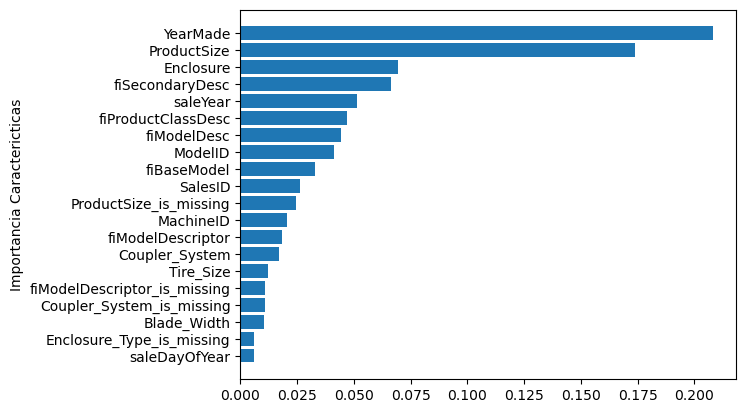

In [102]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [103]:
df["Enclosure"].value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64